In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt
from datetime import datetime

In [2]:
def high_pass(data):
    """
    Applies a high pass filter to the voltage data in the dataframe.

    Parameters:
    data: A Pandas dataframe containing the voltage data.

    Returns:
    A Pandas dataframe containing the flitered voltages of the two channels
    """
    # Define the cutoff frequency (in Hz) for the high pass filter
    cutoff_freq = 1

    # Define the filter order
    filter_order = 8

    # Define the sampling rate (in Hz) for the voltage data
    sampling_rate = 250

    # Define the voltage variable
    voltage_chan_1 = data.iloc[:, 0].values
    voltage_chan_2 = data.iloc[:, 1].values

    # Define the filter coefficients
    nyquist_freq = sampling_rate / 2
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(filter_order, normalized_cutoff_freq, btype='highpass')

    # Apply the filter to the voltage data
    voltage_chan_1 = filtfilt(b, a, voltage_chan_1)
    voltage_chan_2 = filtfilt(b, a, voltage_chan_2)

    return pd.DataFrame({'FP1 (channel 1)': voltage_chan_1, 'FP2 (channel 2)': voltage_chan_2})


def low_pass(data):
    """
    Applies a low pass filter to the voltage data in a Pandas dataframe.

    Parameters:
    data: A Pandas dataframe containing the voltage data.

    Returns:
    A Pandas dataframe containing the flitered voltages of the two channels
    """
    # Define the cutoff frequency (in Hz) for the low pass filter
    cutoff_freq = 5

    # Define the filter order
    filter_order = 8

    # Define the sampling rate (in Hz) for the voltage data
    sampling_rate = 250

    # Define the voltage variable
    voltage_chan_1 = data.iloc[:, 0].values
    voltage_chan_2 = data.iloc[:, 1].values

    # Define the filter coefficients
    nyquist_freq = sampling_rate / 2
    normalized_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = butter(filter_order, normalized_cutoff_freq, btype='lowpass')

    # Apply the filter to the voltage data
    voltage_chan_1 = filtfilt(b, a, voltage_chan_1)
    voltage_chan_2 = filtfilt(b, a, voltage_chan_2)

    return pd.DataFrame({'FP1 (channel 1)': voltage_chan_1, 'FP2 (channel 2)': voltage_chan_2})


def average_min_max(data):
    """
    Calculate the average minimum and maximum filtered and normalized voltage 
    value for channel 1 and 2 based on a manually set threashold.

    Parameters:
    data: A Pandas dataframe containing the filtered voltage data.

    Returns:
    min_1, min_2: averaged minimum value of channel 1 and 2.
    max_1, max_2: averaged maximum value of channel 1 and 2.
    """  
    min_1, max_1, num_min_1, num_max_1= 0, 0, 0, 0
    min_2, max_2, num_min_2, num_max_2= 0, 0, 0, 0
    voltage_chan_1 = data.iloc[:, 0].values
    voltage_chan_2 = data.iloc[:, 1].values

    for i in range(len(voltage_chan_1)):
        # Calculation for channel 1
        if (voltage_chan_1[i] <= -100):
            min_1 += voltage_chan_1[i]
            num_min_1 += 1
        elif (voltage_chan_1[i] >= 70):
            max_1 += voltage_chan_1[i]
            num_max_1 += 1

        # Calculation for channel 2
        if (voltage_chan_2[i] <= -100):
            min_2 += voltage_chan_2[i]
            num_min_2 += 1
        elif (voltage_chan_2[i] >= 70):
            max_2 += voltage_chan_2[i]
            num_max_2 += 1

    return (min_1 / num_min_1), (max_1 / num_max_1), (min_2 / num_min_2), (max_2 / num_max_2)


def preprocess(df):
    df = df.loc[6:,:]
    data = df.iloc[:,1:3]
    time = df.iloc[:, -2]

    # Visualize the raw eye blink data
    plt.plot(time, data.iloc[:, 0], label='chan_1')
    plt.plot(time, data.iloc[:, 1], label='chan_2')
    plt.title("Raw Data")
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.show()

    
    filtered = high_pass(data)
    # Visualize the data after applying the high pass filter
    plt.plot(time, filtered.iloc[:, 0], label='chan_1')
    plt.plot(time, filtered.iloc[:, 1], label='chan_2')
    plt.title("High-Passed Data")
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.show()

    filtered = low_pass(filtered)
    # Visualize the data after applying the low pass filter
    plt.plot(time, filtered.iloc[:, 0], label='chan_1')
    plt.plot(time, filtered.iloc[:, 1], label='chan_2')
    plt.title("Low-Passed Data")
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.show()

    avg_min_1, avg_max_1, avg_min_2, avg_max_2 = average_min_max(filtered)
    print(avg_min_1, avg_max_1, avg_min_2, avg_max_2)


def svt(data):
    # TODO
    return


In [3]:
df = pd.read_csv('Subject_4\CSV\BrainFlow-RAW_2023-03-07_11-46-58_44.csv', delimiter='\t')

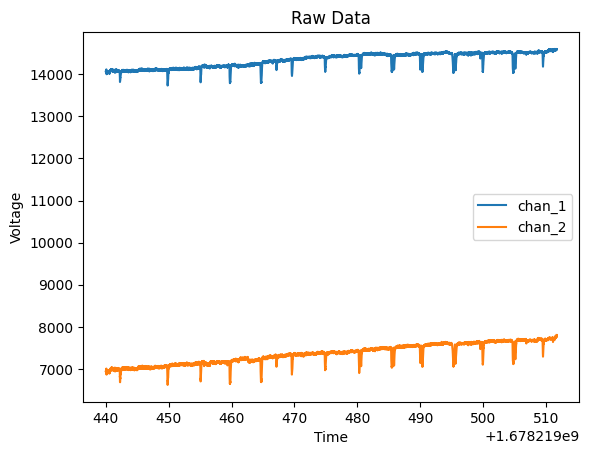

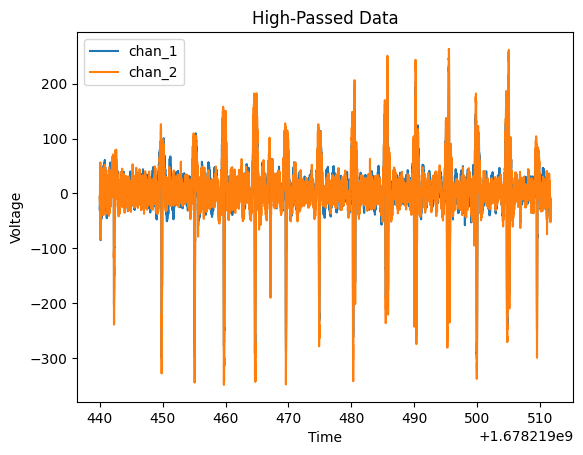

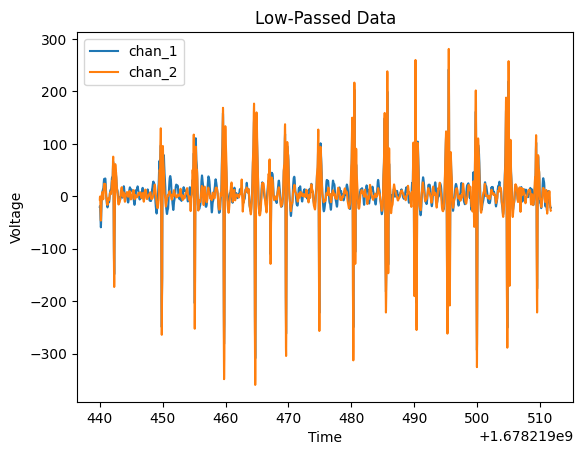

-179.33903068390757 108.69517190996692 -201.13632704307696 119.38833527271647


In [4]:
preprocess(df)